<a href="https://colab.research.google.com/github/poojagolande256-ui/Learning_Studio/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from warnings import filterwarnings
filterwarnings("ignore")


Step 1 Data Ingestion

In [150]:
url1="https://raw.githubusercontent.com/poojagolande256-ui/Learning_Studio/refs/heads/main/Restaurant_Reviews.tsv"

In [151]:
import pandas as pd
df=pd.read_csv(url1,sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Step 2 Text Preprocessing

In [152]:
import re
text="wOw.......???pune Location Outstanding!!!!!!"
text=text.lower()
text=re.sub(r"[^\w\s]","",text)
text=text.strip()
print(text)

wowpune location outstanding


In [153]:
def clean_text(text: str) ->str:
  text=text.lower()
  text=re.sub(r"[^\w\s]","",text)
  text=text.strip()
  return text

In [154]:
clean_text("how are you.........?????$$%")

'how are you'

In [155]:
df["clean"]=df["Review"].apply(clean_text)
df["clean"].head()

,clean
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


Step 3 Separate x & y

In [156]:
x=df["clean"]
y=df["Liked"]

Step 4 Apply TF-IDF

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(x)

TfidfVectorizer()

In [158]:
x_pre=tf.transform(x).toarray()

In [159]:
x_pre.shape

(1000, 2067)

Step 5 Reduce the dimesnsions using SVD - Singular Value Decomposition
reduce the columns from 2067 - 300

In [160]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=300)
svd.fit(x_pre)

TruncatedSVD(n_components=300)

In [161]:
x_pre_red=svd.transform(x_pre)
x_pre_red[0:5]

array([[ 0.11457856,  0.19021732,  0.29860513, ...,  0.01950363,
        -0.01129264,  0.07255217],
       [ 0.20041515,  0.06219206,  0.10386264, ...,  0.00055382,
        -0.02186647,  0.02432403],
       [ 0.248602  , -0.05947126, -0.09197253, ...,  0.00373626,
        -0.011555  ,  0.01090075],
       [ 0.10419317, -0.0072801 , -0.00104469, ...,  0.04872648,
         0.10833195,  0.00963448],
       [ 0.40883954, -0.19004255, -0.03852556, ...,  0.02217781,
        -0.00440297,  0.00180698]])

In [162]:
x_pre_red.shape

(1000, 300)

Step 6 Train test split

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre_red,y,test_size=0.2,random_state=42)


Step 7 Build neural network

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [165]:
model=Sequential(
    [
        Input(shape=[x_train.shape[1]],),
        Dense(128,activation="relu",kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(64,activation="relu",kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ]
)

Step 6 Compile model

In [166]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

Step 7 Fit the model

In [167]:
es=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
history=model.fit(x_train,y_train,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5173 - loss: 3.0699 - val_accuracy: 0.4875 - val_loss: 2.3609
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6059 - loss: 2.1747 - val_accuracy: 0.5625 - val_loss: 1.7051
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6211 - loss: 1.5850 - val_accuracy: 0.4938 - val_loss: 1.2955
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5989 - loss: 1.2197 - val_accuracy: 0.6250 - val_loss: 1.0459
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.9974 - val_accuracy: 0.5750 - val_loss: 0.8997
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7189 - loss: 0.8664 - val_accuracy: 0.6438 - val_loss: 0.8112
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.7820 - val_accuracy: 0.7437 - val_loss: 0.7573
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8384 - loss: 0.7219 - val_accuracy: 0.7937 - v

Step 8 Plot Learning curve

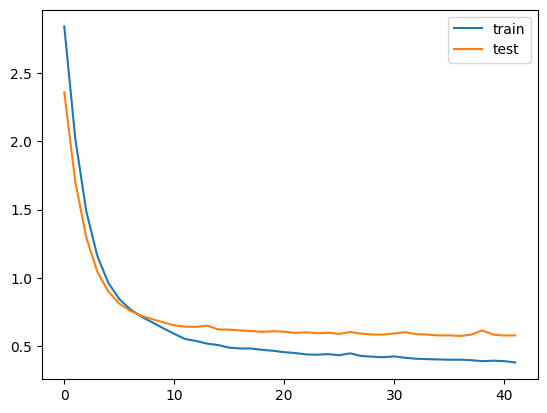

In [168]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"])
plt.show()

Step 8 Model Evaluation

In [171]:
yprob_test=model.predict(x_test)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0.57050055],
       [0.9645869 ],
       [0.9711481 ],
       [0.9649403 ],
       [0.37696296]], dtype=float32)

In [172]:
ypred_test=[1 if prob>=0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[1, 1, 1, 1, 0]

In [173]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,ypred_test))
print(confusion_matrix(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        96
           1       0.86      0.70      0.77       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200

[[84 12]
 [31 73]]


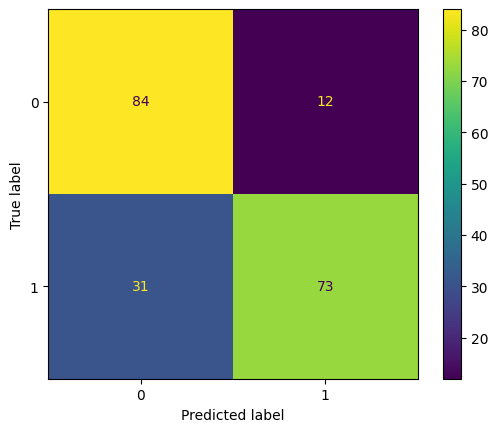

In [175]:
print(ConfusionMatrixDisplay.from_predictions(y_test,ypred_test))

0.7884615384615384


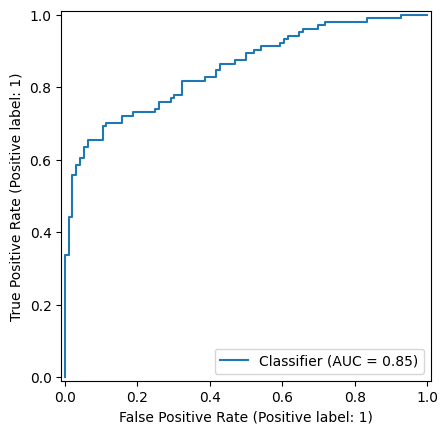

In [178]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score
print(RocCurveDisplay.from_predictions(y_test,yprob_test))
print(roc_auc_score(y_test,ypred_test))

Step 9 Model inference